In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
pd.set_option('display.max_rows',None) # to display all rows & dots will remove
pd.set_option('display.max_columns',None) # to display all rows & dots will remove

In [38]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Evaluation Project Phase - Week 3 - (19-02)\temperature prediction.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [39]:
df.drop({'Date'},axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


In [41]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [42]:
df = df.dropna(subset=['LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'], how='all')

In [43]:
df['Present_Tmax'].fillna(int(df['Present_Tmax'].mean()), inplace=True)
df['Present_Tmin'].fillna(int(df['Present_Tmin'].mean()), inplace=True)
df['Next_Tmax'].fillna(int(df['Next_Tmax'].mean()), inplace=True)
df['Next_Tmin'].fillna(int(df['Next_Tmin'].mean()), inplace=True)
df['station'].fillna(int(df['station'].mean()), inplace=True)

In [44]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [45]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000
mean,13.000000,29.739990,23.193839,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.868100,1.257052,5343.632222,30.236629,22.906956
std,7.210633,2.956983,2.393772,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.280038,1.370450,429.990083,3.110329,2.481168
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5002.308105,28.200000,21.300000
50%,13.000000,29.900000,23.300000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5441.393066,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5729.839844,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [46]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112880,0.132402,-0.067058,-0.167798,0.069444,0.105269,0.005303,-0.134007,0.006953,0.003413,0.000697,0.006156,-0.002723,-0.008290,-0.012522,-0.010452,-0.237500,-0.118704,-0.255828,-0.090060,-0.018967,0.108336,0.128218
Present_Tmax,0.112880,1.000000,0.616230,-0.205842,-0.303558,0.573135,0.626334,-0.122481,0.136307,-0.313324,-0.215170,-0.145273,-0.142165,-0.109396,-0.099998,-0.120882,-0.100416,-0.052058,0.009423,-0.187041,-0.105425,-0.020872,0.608770,0.619534
Present_Tmin,0.132402,0.616230,1.000000,0.124112,-0.015397,0.468330,0.769638,-0.035010,-0.009265,0.085171,0.090921,-0.003004,-0.045003,0.113879,0.068745,-0.046510,-0.063639,-0.078636,-0.042906,-0.250997,-0.146363,0.061547,0.463499,0.794426
LDAPS_RHmin,-0.067058,-0.205842,0.124112,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.441870,0.095105
LDAPS_RHmax,-0.167798,-0.303558,-0.015397,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286311,-0.072704
LDAPS_Tmax_lapse,0.069444,0.573135,0.468330,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.834572,0.590586
LDAPS_Tmin_lapse,0.105269,0.626334,0.769638,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.592133,0.885093
LDAPS_WS,0.005303,-0.122481,-0.035010,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.345799,-0.097324
LDAPS_LH,-0.134007,0.136307,-0.009265,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.158912,-0.056162
LDAPS_CC1,0.006953,-0.313324,0.085171,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.456633,-0.011507


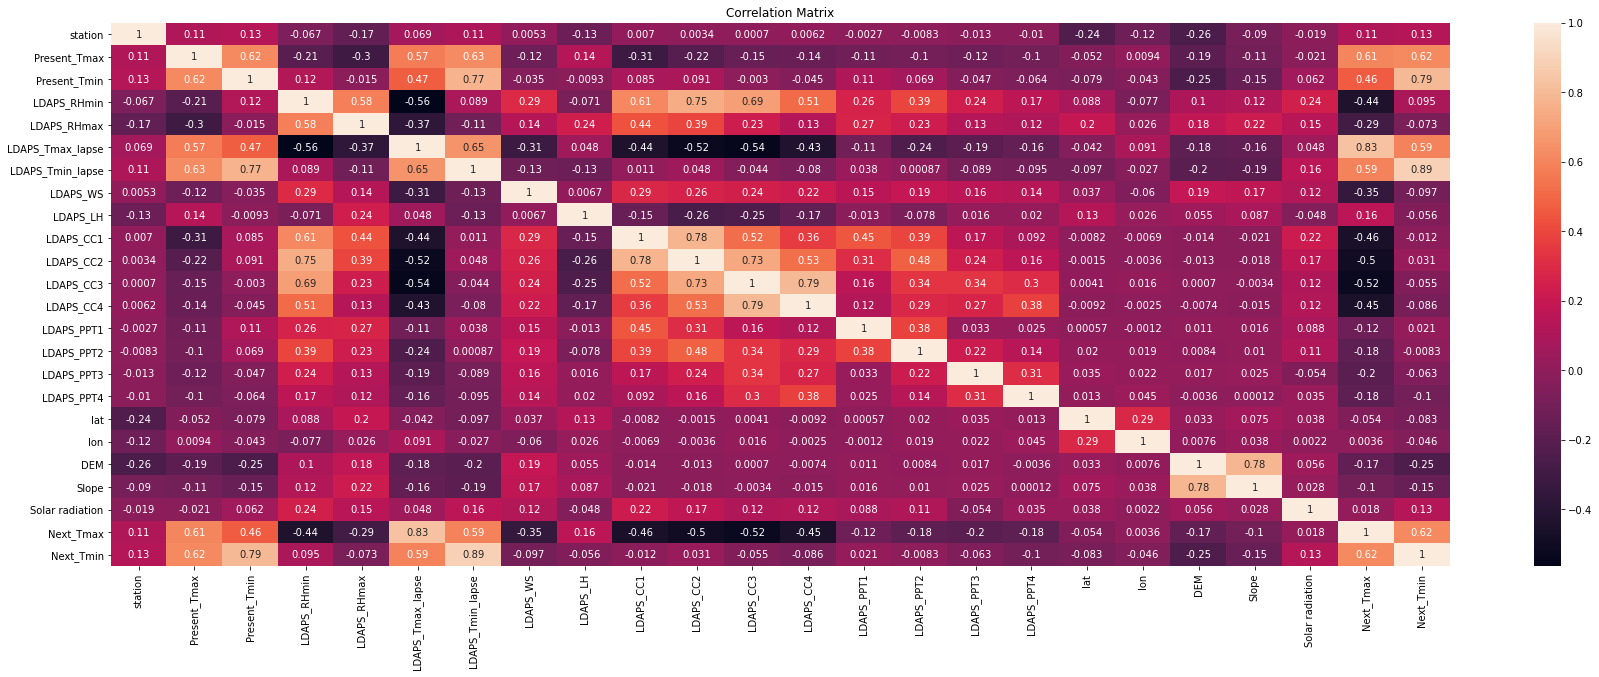

In [12]:
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[30,10])
#Plot Correlation Matrix
sns.heatmap(corr_mat,annot=True) # annot represnts each value encoded in heatmap
plt.title('Correlation Matrix')
plt.show()

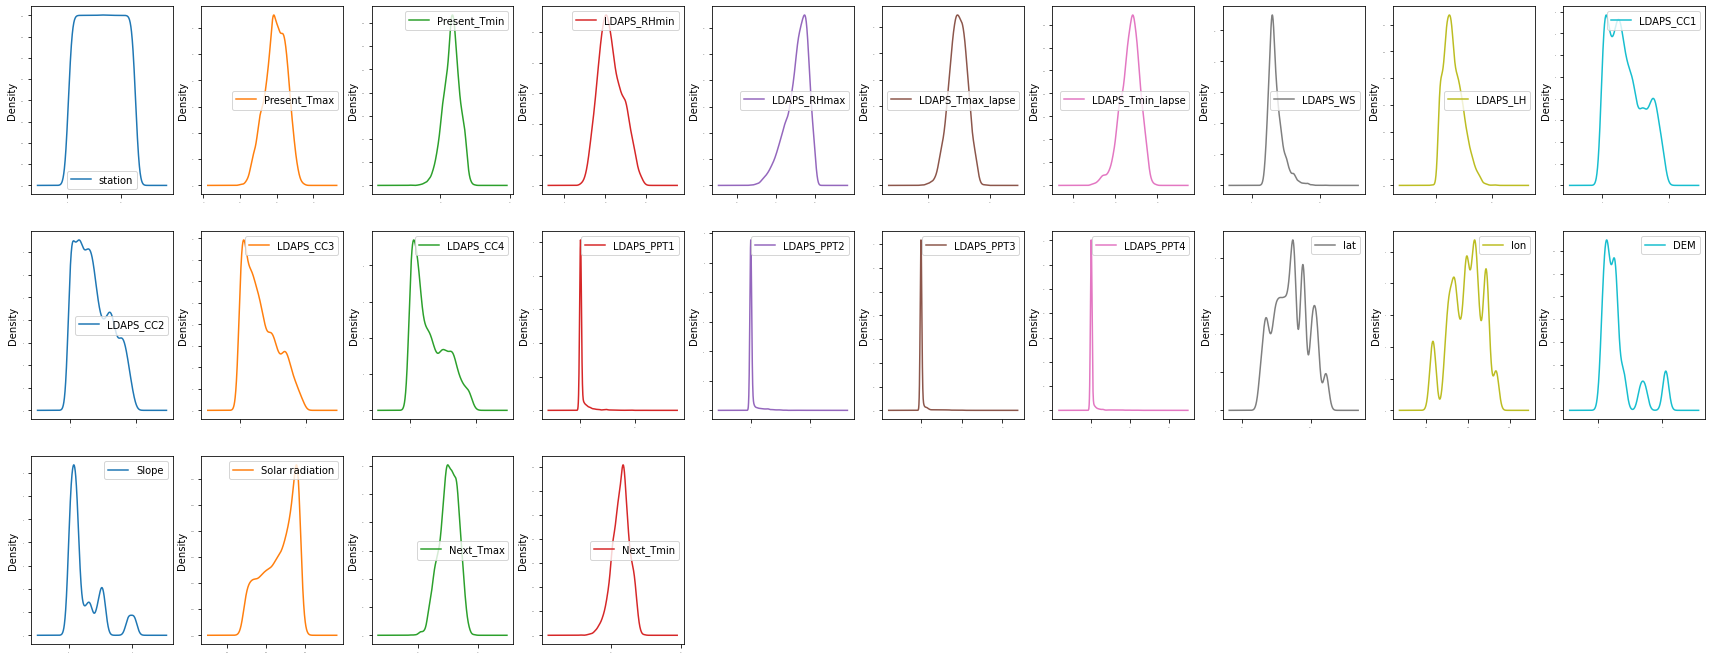

In [13]:
df.plot(kind='density',subplots=True,layout=(5,10),sharex=False,fontsize=1,figsize=(30,20))
plt.show()

# Next_Tmax

In [14]:
x=df.drop(['Next_Tmax'],axis=1)
y=df['Next_Tmax']

In [15]:
# Checking Skweness
x.skew().sort_values(ascending=False) # For descending

LDAPS_PPT4          6.792379
LDAPS_PPT3          6.425829
LDAPS_PPT2          5.747360
LDAPS_PPT1          5.367675
DEM                 1.723254
LDAPS_WS            1.571581
Slope               1.563020
LDAPS_LH            0.670491
LDAPS_CC4           0.663251
LDAPS_CC3           0.637630
LDAPS_CC2           0.470060
LDAPS_CC1           0.457231
LDAPS_RHmin         0.298765
lat                 0.087063
station             0.000000
LDAPS_Tmax_lapse   -0.226775
Present_Tmax       -0.251593
lon                -0.285213
Present_Tmin       -0.364082
Next_Tmin          -0.397771
Solar radiation    -0.521290
LDAPS_Tmin_lapse   -0.578943
LDAPS_RHmax        -0.850870
dtype: float64

In [16]:
# Remove the Skweness of the data
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [17]:
x.skew().sort_values(ascending=False) # For descending 

LDAPS_PPT4          2.046746
LDAPS_PPT3          1.813523
LDAPS_PPT2          1.634869
LDAPS_PPT1          1.452317
Slope               0.233969
LDAPS_CC4           0.130399
LDAPS_CC3           0.090644
lat                 0.070228
LDAPS_LH            0.055628
LDAPS_CC1           0.048496
LDAPS_CC2           0.047032
DEM                 0.039457
LDAPS_WS            0.004480
Present_Tmin       -0.010475
LDAPS_Tmax_lapse   -0.010970
Next_Tmin          -0.013420
LDAPS_RHmin        -0.018207
LDAPS_Tmin_lapse   -0.020507
Present_Tmax       -0.033890
LDAPS_RHmax        -0.118881
Solar radiation    -0.181079
lon                -0.198427
station            -0.204566
dtype: float64

In [18]:
# Remove the Skweness of the data
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [19]:
x.skew().sort_values(ascending=False) # For descending

LDAPS_PPT4          1.490305
LDAPS_PPT3          1.254322
LDAPS_PPT2          1.188176
LDAPS_PPT1          1.054741
LDAPS_CC4           0.032515
Slope               0.029346
LDAPS_CC3           0.018549
lat                 0.013269
DEM                 0.008740
LDAPS_CC2           0.006539
LDAPS_CC1           0.004253
LDAPS_Tmin_lapse    0.002506
LDAPS_RHmax         0.002405
Present_Tmax        0.000135
Next_Tmin          -0.007880
LDAPS_Tmax_lapse   -0.008147
Present_Tmin       -0.008715
lon                -0.013343
LDAPS_RHmin        -0.024227
LDAPS_WS           -0.034106
station            -0.039865
Solar radiation    -0.044462
LDAPS_LH           -0.063226
dtype: float64

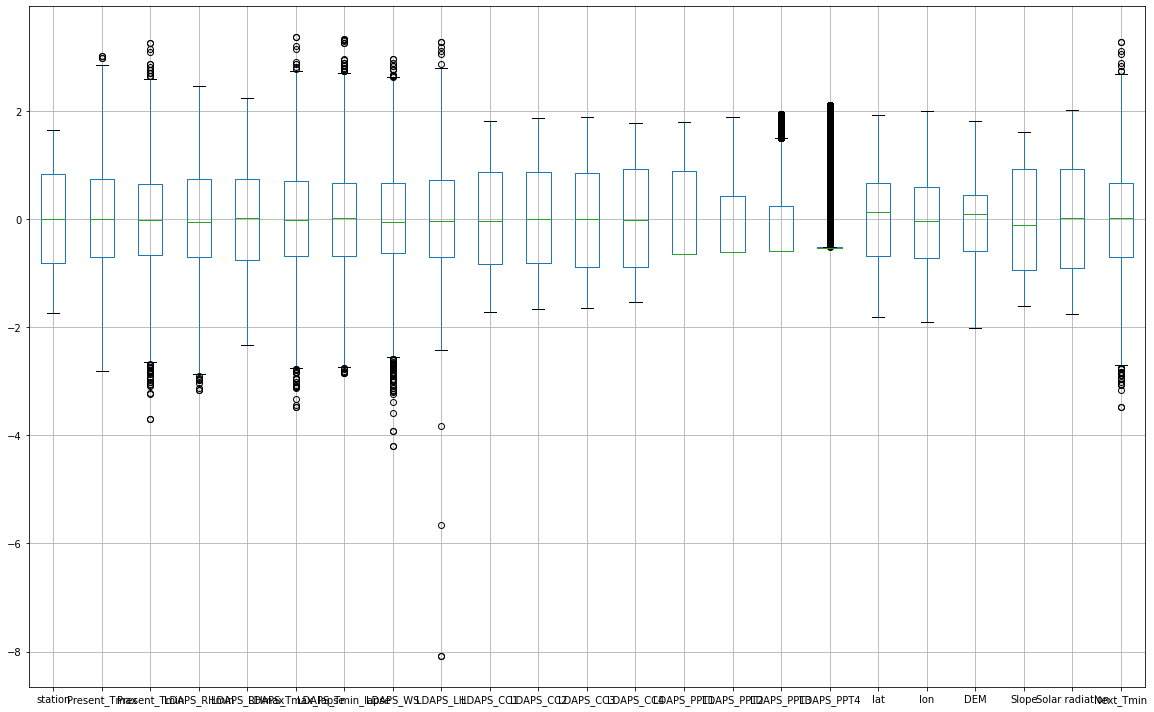

In [20]:
# Checking Outliers in data
# Plot boxplot
x.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(7677, 23)

In [22]:
threshold=2.5
print(np.where(z>2.5))

(array([  44,  394, 1301, 1316, 1575, 1600, 1752, 1753, 1754, 1755, 1756,
       1757, 1760, 1761, 1762, 1763, 1764, 1766, 1768, 1769, 1770, 1771,
       1773, 1774, 2104, 2106, 2108, 2150, 2156, 2157, 2158, 2159, 2161,
       2163, 2164, 2168, 2169, 2330, 2331, 2331, 2332, 2337, 2342, 2345,
       2346, 2347, 2348, 2349, 2356, 2357, 2358, 2362, 2363, 2367, 2369,
       2370, 2371, 2372, 2373, 2374, 2385, 2387, 2391, 2396, 2428, 2440,
       2441, 2442, 2519, 2606, 2608, 2609, 2616, 2631, 2633, 2637, 2641,
       2650, 2710, 2712, 2715, 2716, 2717, 2750, 2766, 2790, 2791, 2792,
       2991, 3016, 3079, 3091, 3141, 3159, 3165, 3166, 3166, 3175, 3184,
       3190, 3191, 3216, 3216, 3241, 3364, 3369, 3375, 3394, 3416, 3441,
       3454, 3456, 3469, 3475, 3500, 3529, 3540, 3541, 3542, 3546, 3944,
       4002, 4020, 4241, 4316, 4469, 4541, 4566, 4566, 4676, 4681, 4683,
       4691, 4744, 4790, 4906, 4916, 4917, 5025, 5050, 5228, 5412, 5416,
       5477, 5492, 5495, 5498, 5498, 5499, 5507, 5

In [23]:
x_new=x[(z<2.5).all(axis=1)]
print(x.shape)
print(x_new.shape)

(7677, 23)
(7342, 23)


In [24]:
y_new=y[(z<2.5).all(axis=1)]
print(y.shape)
print(y_new.shape)

(7677,)
(7342,)


In [25]:
# % data loss
loss_percent=(7677-7342)/7677*100
print(loss_percent)

4.363683730623942


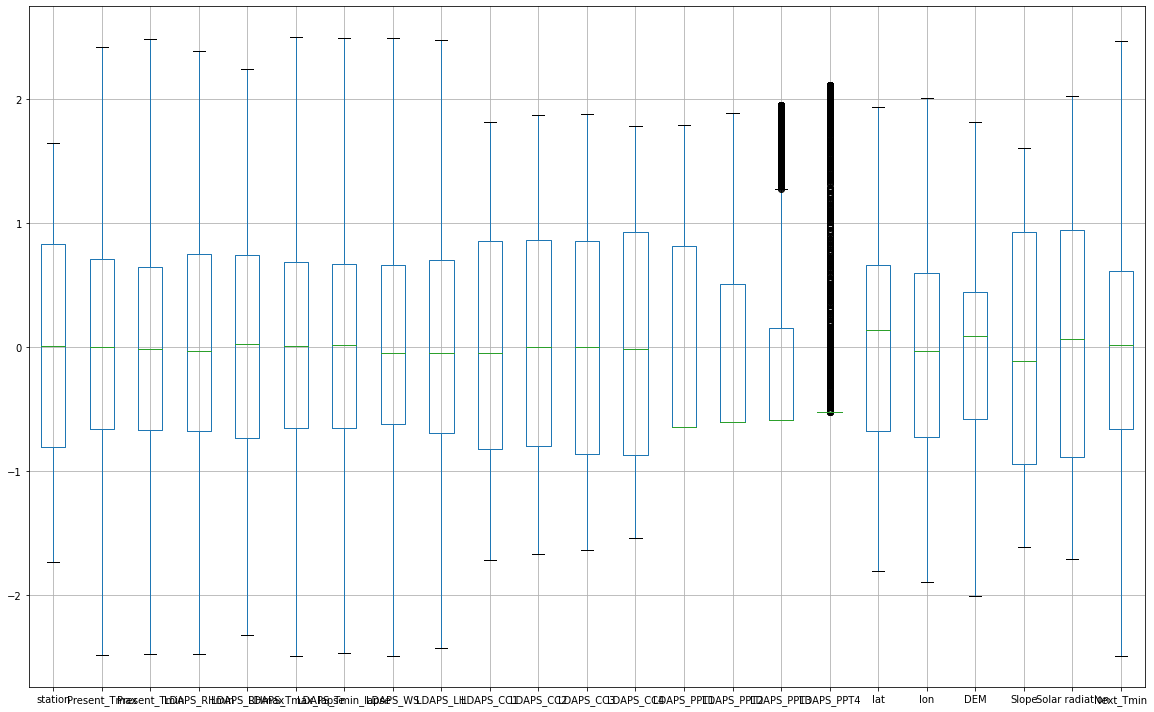

In [26]:
# Plot boxplot - To Check outliers 
x_new.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [27]:
# Training process
# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [28]:
for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=i)
        lr.fit(x_train,y_train) # Fitting the data will train the model
        pred_train=lr.predict(x_train) # Predicting the data # Predicted traget variable
        pred_test=lr.predict(x_test)
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_test,pred_test)}')
        print("\n")

At Random State 0, the training accuracy is :- 0.771560919562956
At Random State 0, the training accuracy is :- 0.7729588886725953


At Random State 1, the training accuracy is :- 0.77097506652706
At Random State 1, the training accuracy is :- 0.775753194899947


At Random State 2, the training accuracy is :- 0.7745855494214824
At Random State 2, the training accuracy is :- 0.761635793337014


At Random State 3, the training accuracy is :- 0.7757281489482505
At Random State 3, the training accuracy is :- 0.7549384454554512


At Random State 4, the training accuracy is :- 0.7733847877680494
At Random State 4, the training accuracy is :- 0.7648024612987083


At Random State 5, the training accuracy is :- 0.7662260647806892
At Random State 5, the training accuracy is :- 0.7942274724871026


At Random State 6, the training accuracy is :- 0.7733255725497967
At Random State 6, the training accuracy is :- 0.766642772863449


At Random State 7, the training accuracy is :- 0.7726266751082435
At

In [29]:
# Cross Validation
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_new,y_new,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is  {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold 2 the cv score is  0.694018513030991 and accuracy score for training is 0.7684341835939147 and accuracy score for testing is 0.7845938468304314


At cross fold 3 the cv score is  0.7248275549064669 and accuracy score for training is 0.7684341835939147 and accuracy score for testing is 0.7845938468304314


At cross fold 4 the cv score is  0.7082637511967331 and accuracy score for training is 0.7684341835939147 and accuracy score for testing is 0.7845938468304314


At cross fold 5 the cv score is  0.7069749372887584 and accuracy score for training is 0.7684341835939147 and accuracy score for testing is 0.7845938468304314


At cross fold 6 the cv score is  0.6999911697735411 and accuracy score for training is 0.7684341835939147 and accuracy score for testing is 0.7845938468304314


At cross fold 7 the cv score is  0.6974432908887893 and accuracy score for training is 0.7684341835939147 and accuracy score for testing is 0.7845938468304314


At cross fold 8 the cv score is  0.

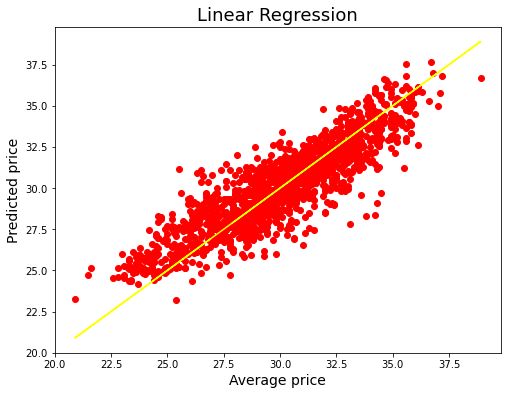

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='red')
plt.plot(y_test,y_test,color='yellow')
plt.xlabel('Average price', fontsize=14)
plt.ylabel('Predicted price', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [31]:
# Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,20))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [32]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.7846125020401952

In [33]:
cv_score=cross_val_score(ls,x_new,y_new,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

70.6994851527599

In [34]:
# Ensemble Technique
from sklearn.ensemble import AdaBoostRegressor
AD = AdaBoostRegressor()
AD.fit(x_train,y_train)
AD.score(x_test,y_test)

0.7477173830008037

In [35]:
# Conclusion:
Data=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_1=pd.DataFrame({'original':Data,'predicted':predicted},index=range(len(Data)))
df_1

,original,predicted
0,26.9,27.659704
1,24.2,27.434566
2,21.5,24.698984
3,32.1,31.525223
4,25.8,25.122302
5,31.5,31.717559
6,29.7,30.572748
7,31.6,32.501262
8,31.3,30.333297
9,28.9,28.374677


# Next_Tmin

In [47]:
x=df.drop(['Next_Tmin'],axis=1)
y=df['Next_Tmin']

In [48]:
# Checking Skweness
x.skew().sort_values(ascending=False) # For descending

LDAPS_PPT4          6.792379
LDAPS_PPT3          6.425829
LDAPS_PPT2          5.747360
LDAPS_PPT1          5.367675
DEM                 1.723254
LDAPS_WS            1.571581
Slope               1.563020
LDAPS_LH            0.670491
LDAPS_CC4           0.663251
LDAPS_CC3           0.637630
LDAPS_CC2           0.470060
LDAPS_CC1           0.457231
LDAPS_RHmin         0.298765
lat                 0.087063
station             0.000000
LDAPS_Tmax_lapse   -0.226775
Present_Tmax       -0.251593
lon                -0.285213
Next_Tmax          -0.339320
Present_Tmin       -0.364082
Solar radiation    -0.521290
LDAPS_Tmin_lapse   -0.578943
LDAPS_RHmax        -0.850870
dtype: float64

In [49]:
# Remove the Skweness of the data
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [50]:
x.skew().sort_values(ascending=False) # For descending

LDAPS_PPT4          2.046746
LDAPS_PPT3          1.813523
LDAPS_PPT2          1.634869
LDAPS_PPT1          1.452317
Slope               0.233969
LDAPS_CC4           0.130399
LDAPS_CC3           0.090644
lat                 0.070228
LDAPS_LH            0.055628
LDAPS_CC1           0.048496
LDAPS_CC2           0.047032
DEM                 0.039457
LDAPS_WS            0.004480
Present_Tmin       -0.010475
LDAPS_Tmax_lapse   -0.010970
LDAPS_RHmin        -0.018207
LDAPS_Tmin_lapse   -0.020507
Present_Tmax       -0.033890
Next_Tmax          -0.038125
LDAPS_RHmax        -0.118881
Solar radiation    -0.181079
lon                -0.198427
station            -0.204566
dtype: float64

In [51]:
# Remove the Skweness of the data
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [52]:
x.skew().sort_values(ascending=False) # For descending

LDAPS_PPT4          1.490305
LDAPS_PPT3          1.254322
LDAPS_PPT2          1.188176
LDAPS_PPT1          1.054741
LDAPS_CC4           0.032515
Slope               0.029346
LDAPS_CC3           0.018549
lat                 0.013269
DEM                 0.008740
LDAPS_CC2           0.006539
LDAPS_CC1           0.004253
LDAPS_Tmin_lapse    0.002506
LDAPS_RHmax         0.002405
Present_Tmax        0.000135
Next_Tmax          -0.000242
LDAPS_Tmax_lapse   -0.008147
Present_Tmin       -0.008715
lon                -0.013343
LDAPS_RHmin        -0.024227
LDAPS_WS           -0.034106
station            -0.039865
Solar radiation    -0.044462
LDAPS_LH           -0.063226
dtype: float64

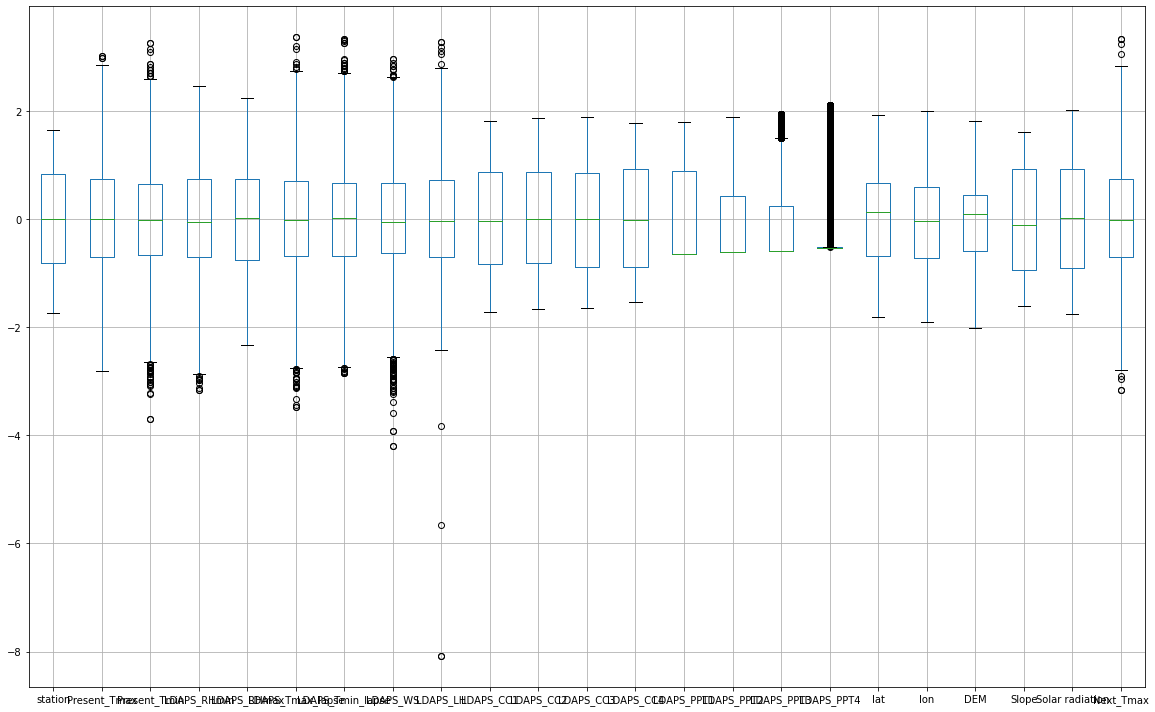

In [53]:
# Plot boxplot - To Check outliers 
x.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(7677, 23)

In [55]:
threshold=2.5
print(np.where(z>2.5))

(array([  44,  394, 1301, 1316, 1575, 1600, 1752, 1753, 1754, 1755, 1756,
       1757, 1760, 1761, 1762, 1763, 1764, 1766, 1768, 1769, 1770, 1771,
       1773, 1774, 2104, 2106, 2108, 2150, 2156, 2157, 2158, 2159, 2161,
       2163, 2164, 2168, 2169, 2331, 2356, 2357, 2358, 2362, 2363, 2367,
       2369, 2370, 2371, 2372, 2373, 2374, 2385, 2387, 2391, 2396, 2428,
       2440, 2441, 2442, 2519, 2606, 2608, 2609, 2616, 2631, 2633, 2637,
       2641, 2650, 2710, 2712, 2715, 2716, 2717, 2725, 2750, 2766, 2790,
       2791, 2792, 3016, 3079, 3091, 3166, 3175, 3184, 3190, 3191, 3216,
       3241, 3364, 3369, 3375, 3394, 3416, 3441, 3454, 3456, 3469, 3500,
       3529, 3540, 3541, 3542, 3546, 3944, 4002, 4017, 4020, 4241, 4316,
       4469, 4566, 4676, 4681, 4683, 4691, 4744, 4790, 4892, 4906, 4916,
       4917, 5000, 5025, 5025, 5050, 5228, 5412, 5416, 5467, 5472, 5477,
       5487, 5492, 5492, 5495, 5496, 5497, 5498, 5498, 5499, 5507, 5512,
       5517, 5520, 5521, 5522, 5523, 5524, 5527, 5

In [56]:
x_new=x[(z<2.5).all(axis=1)]
print(x.shape)
print(x_new.shape)

(7677, 23)
(7356, 23)


In [57]:
# % data loss
loss_percent=(7677-7356)/7677*100
print(loss_percent)

4.181320828448612


In [58]:
y_new=y[(z<2.5).all(axis=1)]
print(y.shape)
print(y_new.shape)

(7677,)
(7356,)


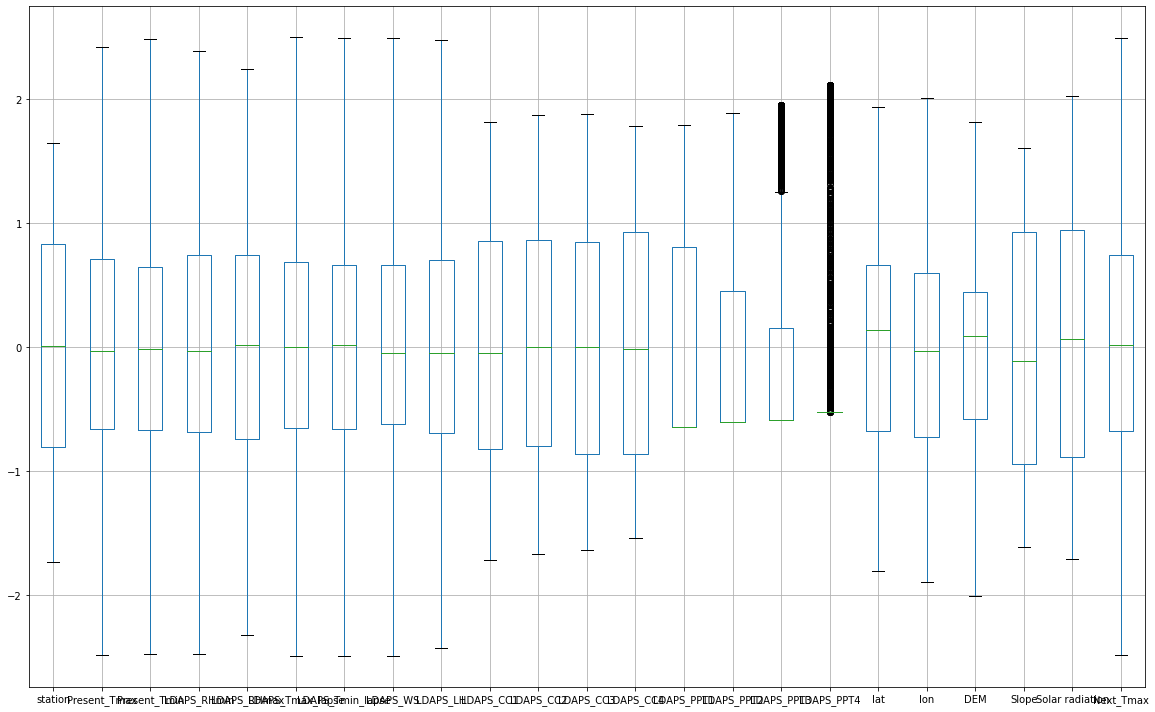

In [59]:
# Plot boxplot - To Check outliers 
x_new.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [60]:
# Training process
# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [61]:
for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=i)
        lr.fit(x_train,y_train) # Fitting the data will train the model
        pred_train=lr.predict(x_train) # Predicting the data # Predicted traget variable
        pred_test=lr.predict(x_test)
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_test,pred_test)}')
        print("\n")

At Random State 0, the training accuracy is :- 0.8276290676880392
At Random State 0, the training accuracy is :- 0.8361572651036794


At Random State 1, the training accuracy is :- 0.8302848744251452
At Random State 1, the training accuracy is :- 0.8257707515001114


At Random State 2, the training accuracy is :- 0.8298019009674817
At Random State 2, the training accuracy is :- 0.8277001634378554


At Random State 3, the training accuracy is :- 0.8287825112221199
At Random State 3, the training accuracy is :- 0.8320734133415402


At Random State 4, the training accuracy is :- 0.8275939507887415
At Random State 4, the training accuracy is :- 0.8359543387507451


At Random State 5, the training accuracy is :- 0.8268281728880845
At Random State 5, the training accuracy is :- 0.838754945670273


At Random State 6, the training accuracy is :- 0.831978681672375
At Random State 6, the training accuracy is :- 0.8191769866239635


At Random State 7, the training accuracy is :- 0.827828825672975

In [62]:
# Cross Validation
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x_new,y_new,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is  {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold 2 the cv score is  0.8108891017507809 and accuracy score for training is 0.8297493155210647 and accuracy score for testing is 0.8275354300305235


At cross fold 3 the cv score is  0.780590321568963 and accuracy score for training is 0.8297493155210647 and accuracy score for testing is 0.8275354300305235


At cross fold 4 the cv score is  0.789162133130922 and accuracy score for training is 0.8297493155210647 and accuracy score for testing is 0.8275354300305235


At cross fold 5 the cv score is  0.7782223059366598 and accuracy score for training is 0.8297493155210647 and accuracy score for testing is 0.8275354300305235


At cross fold 6 the cv score is  0.7606503742690326 and accuracy score for training is 0.8297493155210647 and accuracy score for testing is 0.8275354300305235


At cross fold 7 the cv score is  0.773457775372533 and accuracy score for training is 0.8297493155210647 and accuracy score for testing is 0.8275354300305235


At cross fold 8 the cv score is  0.77

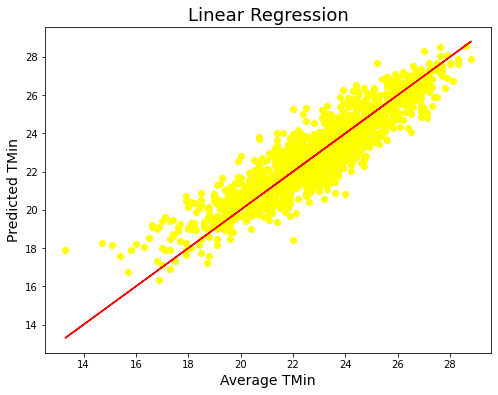

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='yellow')
plt.plot(y_test,y_test,color='red')
plt.xlabel('Average TMin', fontsize=14)
plt.ylabel('Predicted TMin', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [64]:
# Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,20))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [65]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8275251017968749

In [66]:
cv_score=cross_val_score(ls,x_new,y_new,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

77.82635945925618

In [67]:
# Ensemble Technique
from sklearn.ensemble import AdaBoostRegressor
AD = AdaBoostRegressor()
AD.fit(x_train,y_train)
AD.score(x_test,y_test)

0.7896838552242988

In [68]:
# Conclusion:
Data=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_2=pd.DataFrame({'original':Data,'predicted':predicted},index=range(len(Data)))
df_2

,original,predicted
0,25.7,25.167529
1,22.5,24.625877
2,23.1,23.524067
3,24.0,23.303473
4,23.1,22.501997
5,22.5,23.260686
6,24.0,24.051796
7,22.5,21.197407
8,22.7,21.965257
9,22.4,23.594838


In [69]:
# Model Saving
import pickle
filename = 'Temperature Forecast Project.pkl'
pickle.dump(lr,open(filename,'wb'))

# Thank You...!!!